<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de Procesos Financieros. 

**Nombres:** Ana Sofia Durrmuller Acosta y Gerardo González Flores

**Fecha:** 8 de octubre del 2021.

**Expediente** : if723489 if721430

**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/anadurrmuller/Tarea5_ASDurrmuller_GGonzalez.git

# Tarea 5

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ *(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)* [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>



### Respuestas Estudiante 1. Ana Sofia

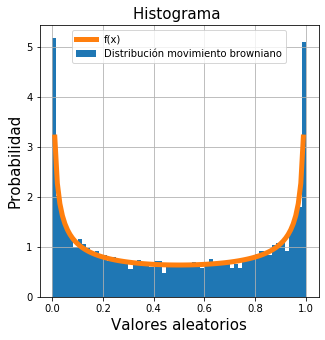

In [12]:
#1. Ejercicio 1
#Funcion
n = 10000
def movimientoBrowniano(n):
    return np.sin((np.random.rand(n)*np.pi)/2)**2

#Grafica
x = np.arange(0.01,1,0.01)
z = movimientoBrowniano(n)
plt.figure(figsize=(5,5))
plt.title("Histograma ",fontsize=15)
plt.xlabel('Valores aleatorios',fontsize=15)
plt.ylabel('Probabilidad',fontsize=15)
plt.hist(z,bins=60,density=True,label='Distribución movimiento browniano')

fx = lambda x: (1)/(np.pi*np.sqrt(1-x)*np.sqrt(x))
plt.plot(x,fx(x),lw=5,label="f(x)",ls="-")
plt.legend()
plt.grid()
plt.show()

In [13]:
#2. Ejercicio 2 
def Gen_distr_discreta(p_acum: 'Probabilidad acumulada de la distribución',
                       indices: 'Valores que se generan aleatoriamente',
                       N: 'cantidad de números aleatorios'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)

    plt.legend()
    plt.show()

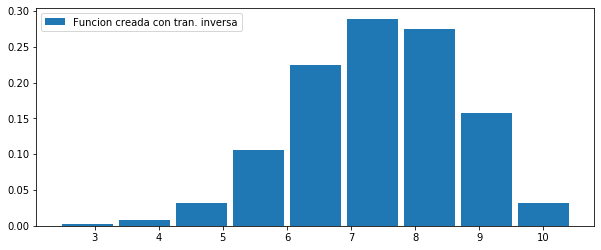

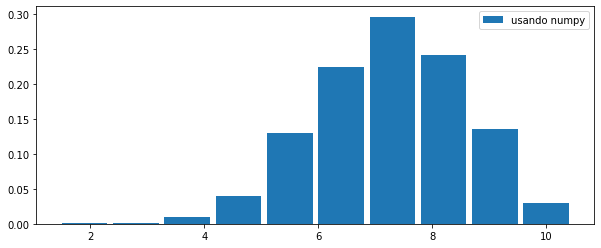

In [15]:
#Funcion que calcula la probabilidad acumulada
def Proba_acum_Binomial(n: 'parámetro n de la distribución binomial',
                      p: 'parámetro p de la distribución binomial'):
    
    proba = np.zeros(n) # vector de n ceros 
    proba[0] = (1-p)**n # primer elemento del vector
    def vector(i):
        nonlocal proba
        proba[i+1]=((p/(1-p))*(n-i)/(i+1))*proba[i]
          
    [vector(i) for i in range(n-1)] # Llenar vector 
    return np.cumsum(proba) #retornar la suma acumulada

n = 10
p = 0.7
N = 1000
p_acum = Proba_acum_Binomial(n,p)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(p_acum, np.arange(0, n+1), N)
plot_histogram_discrete(d_binomial, 'Funcion creada con tran. inversa')

# Usando numpy
d_bino_numpy = np.random.binomial(n,p,N)
plot_histogram_discrete(d_bino_numpy,'usando numpy')

### Respuestas Estudiate 2. Gerardo

1° Obtener función inversa asumiendo que $F(x)$ (función de distribución o de probabilidad acumulada) es uniforme continua:
$$F(x) = \frac{2}{\pi}\sin^{-1} (\sqrt x) = U$$
$$2\sin^{-1} (\sqrt x) = U\pi$$$$\sin^{-1} (\sqrt x) = \frac{U\pi}{2}$$$$\sqrt x = \sin(\frac{U\pi}{2})$$$$x = \sin^{2} (\frac{U\pi}{2}) = F_{inv}$$

2° Obtener función de densidad $f(x)$ a partir de la función de distribución -probabilidad acumulada
$$\frac{dF(x)}{d(x)} = f(x)$$$$f(x) = \frac{d}{dx} (\frac{2}{\pi} \sin^{-1} \sqrt x )$$
$$f(x) = \frac{1}{\pi \sqrt{1-x} \sqrt x}$$

In [2]:
def movbrowniano(N: 'Número de muestras'):
    return (np.sin((np.pi/2)*np.random.rand(N)))**2

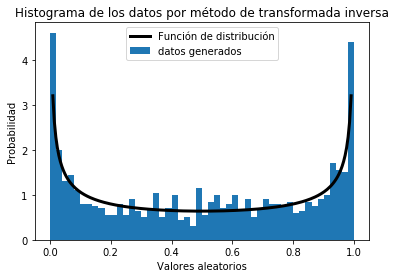

In [5]:
#Datos
N = 1000 
x = movbrowniano(N) # función transformada inversa de la función de distribución
plt.hist(x,bins = 50, density = True, label = 'datos generados') #histograma de la TI
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma con el método de la TI')

x = np.linspace(0.01,0.99,200)
y = lambda x: 1/(np.pi*(np.sqrt(x*(1-x))))
plt.plot(x,y(x),'k',lw = 3, label = 'Función de distribución')
plt.title('Histograma de los datos por método de transformada inversa')
plt.ylabel('Probabilidad')
plt.xlabel('Valores aleatorios')
plt.legend()
plt.show()

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> *Nota:* Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum {x{i}\leq x}\operatorname {P} (X=x_{i})=\sum {x{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).

In [6]:
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

In [7]:
def Binomial_acum(n:'Valor n de binomial',p:'Probabilidad'):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        Pr[i+1]=((p/(1-p))*(n-i)/(i+1))*Pr[i]
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

In [8]:
N = 1000
n = 10
p = 0.7
dis = Binomial_acum(n,p)
muestra = Gen_distr_discreta(dis,np.arange(0, n+1),N)


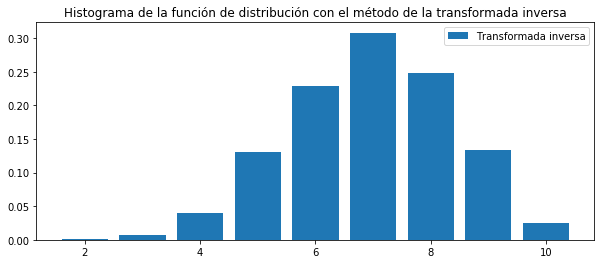

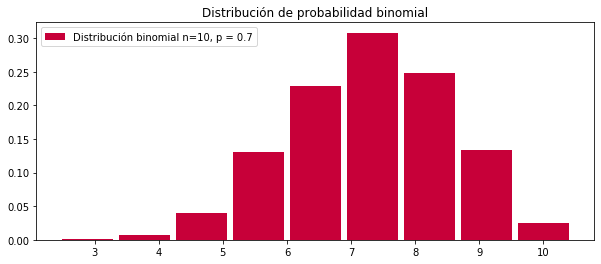

In [10]:
# Histograma de la muestra generada por el método de la transformada inversa
plt.figure(figsize=[10,4])
y, x = np.histogram(muestra, bins=len(set(muestra)), density=True) 
plt.bar(range(min(muestra),11), y, label='Transformada inversa')
plt.legend()
plt.title('Histograma de la función de distribución con el método de la transformada inversa')
plt.show()

# Distribución de probabilidad original
bino = np.random.binomial(n,p,N)
plt.figure(figsize=[10,4])
y1, x1 = np.histogram(muestra, bins=len(set(muestra)), density=True) 
plt.bar(x[1:], y, color = '#C70039',label='Distribución binomial n=10, p = 0.7')
plt.title('Distribución de probabilidad binomial')
plt.legend()
plt.show()

In [ ]:
datos = pd.read_cvs('titannnic.cvs')
df = pd.DataFrame(datos)
x = df['Embarked']
y = df['Age']
